In [1]:
# harsanyi_shap.ipynb
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, project_root)

# Transformer-based Harsanyi (ViT SHAP)

In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from models.harsanyi import HarsanyiViT, train_harsanyi_vit
from harsanyi_utils.harsanyi_shap_utils import compute_shap_from_harsanyi_vit, visualize_harsanyi_shap
from data.data import get_imagenette_dataloader
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
harsanyi_vit_model = HarsanyiViT(model_name='vit_base_patch16_224', pretrained=True, num_classes=10).to(device)

In [4]:
dataloader = get_imagenette_dataloader(batch_size=32, img_size=224)
images, labels = next(iter(dataloader))

Imagenette already exists, skipping download.


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
harsanyi_vit_model = harsanyi_vit_model.to(device)

train_harsanyi_vit(harsanyi_vit_model, dataloader)

Epoch [1/20], Loss: 24.3416, LR: 0.000248
Epoch [2/20], Loss: 3.5021, LR: 0.000244
Epoch [3/20], Loss: 1.2801, LR: 0.000236
Epoch [4/20], Loss: 0.9548, LR: 0.000226
Epoch [5/20], Loss: 0.7924, LR: 0.000213
Epoch [6/20], Loss: 0.6672, LR: 0.000198
Epoch [7/20], Loss: 0.6418, LR: 0.000182
Epoch [8/20], Loss: 0.6283, LR: 0.000164
Epoch [9/20], Loss: 0.6092, LR: 0.000145
Epoch [10/20], Loss: 0.6016, LR: 0.000125
Epoch [11/20], Loss: 0.6013, LR: 0.000105
Epoch [12/20], Loss: 0.6013, LR: 0.000086
Epoch [13/20], Loss: 0.6013, LR: 0.000068
Epoch [14/20], Loss: 0.6013, LR: 0.000052
Epoch [15/20], Loss: 0.6013, LR: 0.000037
Epoch [16/20], Loss: 0.6013, LR: 0.000024
Epoch [17/20], Loss: 0.6013, LR: 0.000014
Epoch [18/20], Loss: 0.6013, LR: 0.000006
Epoch [19/20], Loss: 0.6013, LR: 0.000002
Epoch [20/20], Loss: 0.6013, LR: 0.000000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SHAP value range before normalization: min=0.7218327522277832, max=98.55423736572266
Normalized SHAP value range: min=0.0, max=1.0


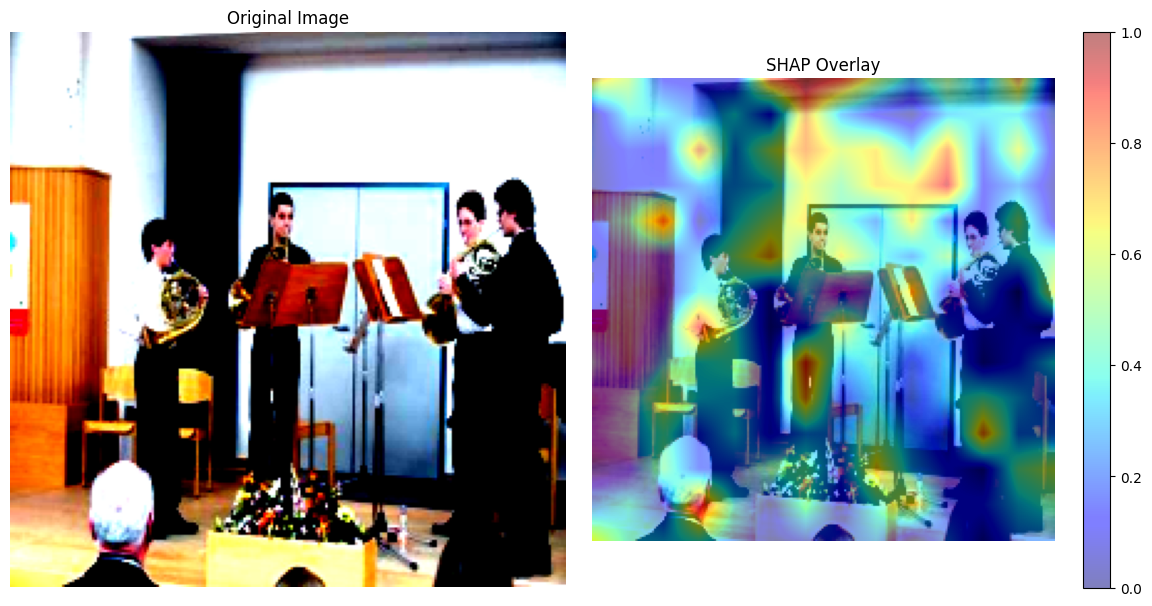

In [6]:
shap_values = compute_shap_from_harsanyi_vit(harsanyi_vit_model, images)
visualize_harsanyi_shap(shap_values[0], images[0].cpu().permute(1, 2, 0).numpy())

The SHAP overlay appears to have strong overlap with the regions of interest, with the color gradient clearly indicating a sharper distinction between regions of interest. the learned Shapley values from HarsanyiNet prioritize certain features within the scene more distinctly, capturing complex patterns that correlate closely with higher-level features learned by the model.

GradientSHAP in comparison to Shapley values from HarsanyiNet clearly appears more spread out, and less localized. This suggests that the HarsanyiNet overlay suggests better interpretability for complex patterns, whereas GradientSHAP's approach might make it easier to understand general trends in pixel importance.

# Harsanyi SHAP (ResNet 3d)

In [7]:
# Cell 2
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from models.harsanyi import HarsanyiResNet3D, train_harsanyi_resnet3d
from harsanyi_utils.harsanyi_shap_utils import compute_shap_from_harsanyi_resnet3d, visualize_3d_resnet_shap
from data.data import get_ucf101_dataloader
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
harsanyi_resnet_3d_model = HarsanyiResNet3D(pretrained=True, num_classes=10).to(device)

In [24]:
dataloader = get_ucf101_dataloader(batch_size=4, img_size=112, data_dir='../data', num_frames=16)
video_batch, labels = next(iter(dataloader))


v_ApplyEyeMakeup_g01_c01.avi already exists, skipping download.
v_ApplyEyeMakeup_g01_c02.avi already exists, skipping download.
v_BoxingPunchingBag_g01_c01.avi already exists, skipping download.
v_BoxingPunchingBag_g01_c02.avi already exists, skipping download.


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

reassigning manually initialized videoclips
reassigning samples and indices based on the manually initialized videoclips


In [10]:
video_batch = video_batch.permute(0, 1, 2, 3, 4)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
harsanyi_resnet_3d_model = harsanyi_resnet_3d_model.to(device)

# Train the Harsanyi 3D ResNet
train_harsanyi_resnet3d(harsanyi_resnet_3d_model, dataloader)

Epoch [1/20], Loss: 13.1364, LR: 0.000248
Epoch [2/20], Loss: 0.8404, LR: 0.000244
Epoch [3/20], Loss: 1.3350, LR: 0.000236
Epoch [4/20], Loss: 2.2690, LR: 0.000226
Epoch [5/20], Loss: 0.3394, LR: 0.000213
Epoch [6/20], Loss: 1.8705, LR: 0.000198
Epoch [7/20], Loss: 1.5348, LR: 0.000182
Epoch [8/20], Loss: 0.4274, LR: 0.000164
Epoch [9/20], Loss: 0.6562, LR: 0.000145
Epoch [10/20], Loss: 0.6177, LR: 0.000125
Epoch [11/20], Loss: 0.2057, LR: 0.000105
Epoch [12/20], Loss: 0.2032, LR: 0.000086
Epoch [13/20], Loss: 0.2012, LR: 0.000068
Epoch [14/20], Loss: 0.2001, LR: 0.000052
Epoch [15/20], Loss: 0.2005, LR: 0.000037
Epoch [16/20], Loss: 0.2001, LR: 0.000024
Epoch [17/20], Loss: 0.2003, LR: 0.000014
Epoch [18/20], Loss: 0.2002, LR: 0.000006
Epoch [19/20], Loss: 0.2000, LR: 0.000002
Epoch [20/20], Loss: 0.1999, LR: 0.000000


In [22]:
video_sample = video_batch[0].unsqueeze(0)

device = next(harsanyi_resnet_3d_model.parameters()).device
video_sample = video_sample.to(device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SHAP value range before normalization: min=-103.12275695800781, max=89.13409423828125
Normalized SHAP value range: min=0.0, max=1.0


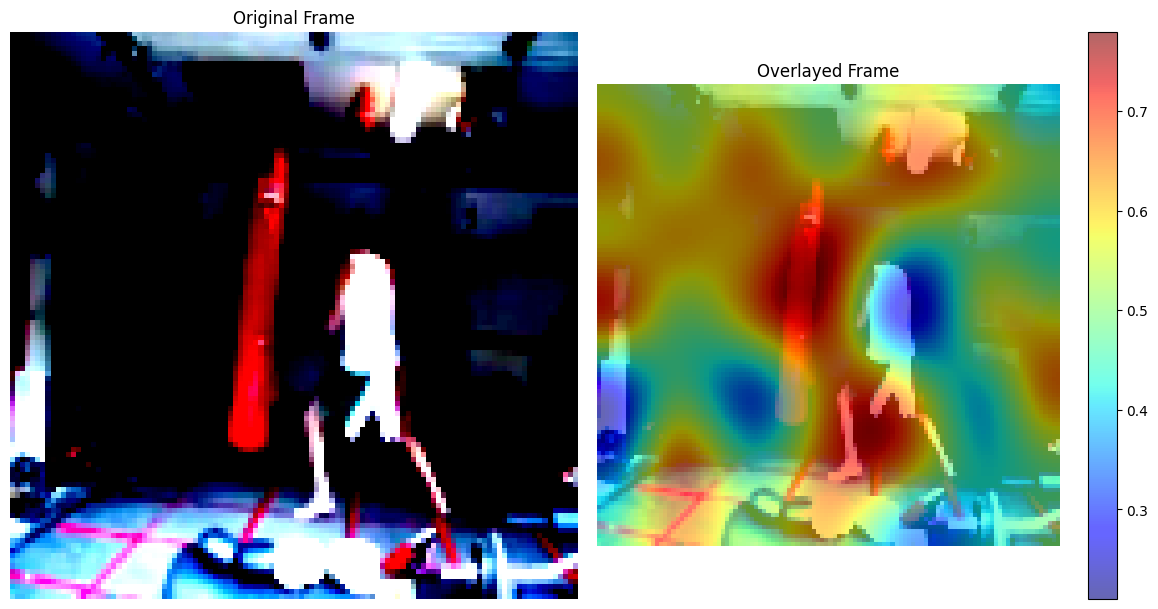

In [25]:
shap_values = compute_shap_from_harsanyi_resnet3d(harsanyi_resnet_3d_model, video_sample)
visualize_3d_resnet_shap(
    shap_values[0], 
    video_sample, 
    frame_idx=1, 
    patch_size=(1, 1, 1), 
    smooth=True,
    img_size=(2, 7, 7)
)

The transitions between high-importance and low-importance areas are clearer, with distinct zones. This aligns with HarsanyiNet's learned capacity to distinguish significant features related to the prediction. The HarsanyiNet overlay provides a more pronounced focus on key regions.

HarsanyiNet shows a clearer, more targeted set of regions of interest. This aligns with its strength in learning precise Shapley values that can highlight contextually relevant parts of an image with greater accuracy.

GradientExplainer provides broader coverage, potentially useful for understanding general patterns but lacks the fine granularity in feature importance that HarsanyiNet captures.

HarsanyiNet’s explanation is easier to interpret for specific decision-making tasks, while GradientExplainer might give a holistic but less interpretable view.